In [1]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

### Adam Candrák/Mária Matušisková - 50%/50%

# Imports

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns

# Phase 1 - Exploratory analysis

## 1.1 Basic description of the data together with characteristics
### EDA with visualization
-------------------------------------------------------------------------------------------
#### Analysis of data structures such as files (structures and relations, number, types, ...), records (structures, number of records, number of attributes, types, ...)


#### *1. Load dataset Processes*

In [2]:
connections_file = "../data/Connections.csv"
devices_file = "../data/Devices.csv"
processes_file = "../data/Processes.csv"
profiles_file = "../data/Profiles.csv"

connections = pd.read_csv(connections_file, sep='\t')
devices = pd.read_csv(devices_file, sep='\t')
processes = pd.read_csv(processes_file, sep='\t')
profiles = pd.read_csv(profiles_file, sep='\t')

- **Processes** - The dataset contains logs from the mobile device. The logs are from usage of applications or services. The dataset has these attributes:
    - ts - timestamp
    - imei - International Mobile Equipment Identity - It is a unique number that helps identify device or track it when it is lost. Furthermore, it is preventing from unauthorized network access.
    - mwra - indicates malware-related-activity in one time interval
    - p.android.packageinstaller - usage of the Android Package Installer in the device
    - p.system - Android system processes
    - p.android.documentsui - DocumentUI module, controls access to specific files
    - p.android.chrome - usage of the Chrome app in the device
    - p.android.settings - represents Android Settings module, where the configuration of the device is set
    - p.android.gm - usage of the Gmail app in the device
    - p.android.externalstorage - represents external storage processes
    - p.android.defcontainer - represents default container
    - p.android.vending - refers to Google Play Store
    - p.inputmethod.latin - latin input method for the keyboard
    - p.dogalize - usage of the Dogalize app
    - p.process.gapps - refers to google apps 
    - p.simulator
    - p.katana - usage of the Facebook app in the device
    - p.android.gms - refers to Google Mobile Services
    - p.google - google's core services
    - p.olauncher - usage of Olauncher app
    - p.browser.provider - refers to the browser provider service
    - p.notifier - process that manages notifications
    - p.gms.persistent - process that manages background services

In [3]:
processes.columns

Index(['ts', 'imei', 'mwra', 'p.android.packageinstaller', 'p.system',
       'p.android.documentsui', 'p.android.chrome', 'p.android.settings',
       'p.android.gm', 'p.android.externalstorage', 'p.android.defcontainer',
       'p.android.vending', 'p.inputmethod.latin', 'p.dogalize',
       'p.process.gapps', 'p.simulator', 'p.katana', 'p.android.gms',
       'p.google', 'p.olauncher', 'p.browser.provider', 'p.notifier',
       'p.gms.persistent'],
      dtype='object')

Types of the columns:

In [4]:
processes.dtypes

ts                             object
imei                            int64
mwra                          float64
p.android.packageinstaller    float64
p.system                      float64
p.android.documentsui         float64
p.android.chrome              float64
p.android.settings            float64
p.android.gm                  float64
p.android.externalstorage     float64
p.android.defcontainer        float64
p.android.vending             float64
p.inputmethod.latin           float64
p.dogalize                    float64
p.process.gapps               float64
p.simulator                   float64
p.katana                      float64
p.android.gms                 float64
p.google                      float64
p.olauncher                   float64
p.browser.provider            float64
p.notifier                    float64
p.gms.persistent              float64
dtype: object

The size of the dataset is 347 116.

In [5]:
processes.size

347116

Shows the first lines of the dataset.

In [6]:
processes.head()

,ts,imei,mwra,p.android.packageinstaller,p.system,p.android.documentsui,p.android.chrome,p.android.settings,p.android.gm,p.android.externalstorage,...,p.dogalize,p.process.gapps,p.simulator,p.katana,p.android.gms,p.google,p.olauncher,p.browser.provider,p.notifier,p.gms.persistent
0,2018-05-05 10:00:00,3590433799317662188,1.0,11.77585,13.10274,11.32035,14.79679,14.39938,14.30820,14.71560,...,95.23250,99.55387,82.64951,55.62534,43.73958,28.79282,8.22474,73.26391,25.28004,86.66346
1,2018-05-05 10:01:00,3590433799317662394,1.0,10.08300,14.07492,7.06121,13.42590,11.51973,15.31808,10.26026,...,73.67809,55.93619,27.33158,68.28812,67.18486,19.40350,19.26265,58.69464,90.54099,33.10194
2,2018-05-05 10:02:00,3590433799317661834,0.0,14.99637,7.37201,14.69521,5.94403,12.33770,12.90814,12.31617,...,49.43847,92.96630,54.04233,25.01599,57.15110,60.38043,16.88231,55.62452,16.82005,81.58652
3,2018-05-05 10:03:00,8630330696303481289,0.0,14.76022,9.85944,13.75118,7.17803,14.33403,11.99134,11.48915,...,71.37356,8.34277,87.09809,5.21806,98.58641,97.22889,37.30215,68.75315,26.44336,79.98101
4,2018-05-05 10:04:00,8630330696303481149,0.0,11.88195,11.32414,11.61858,11.65522,14.65559,10.64599,14.80087,...,14.58892,27.72954,81.20459,22.42807,25.06680,73.26831,43.72205,78.80356,16.55350,75.03307


See more info about the dataset... There is a rule that the columns should not have null values.

In [7]:
processes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15092 entries, 0 to 15091
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ts                          15092 non-null  object 
 1   imei                        15092 non-null  int64  
 2   mwra                        15092 non-null  float64
 3   p.android.packageinstaller  15092 non-null  float64
 4   p.system                    15092 non-null  float64
 5   p.android.documentsui       15092 non-null  float64
 6   p.android.chrome            15092 non-null  float64
 7   p.android.settings          15092 non-null  float64
 8   p.android.gm                15092 non-null  float64
 9   p.android.externalstorage   15092 non-null  float64
 10  p.android.defcontainer      15092 non-null  float64
 11  p.android.vending           15092 non-null  float64
 12  p.inputmethod.latin         15092 non-null  float64
 13  p.dogalize                  150

Let's see the descriptive statistics for data distribution:
- count - the final number of the non-null values
- mean - the average of the values in the each column
- std - the standard deviation (how spread out the data are)
- min - the smallest value in the each column
- 25% - the value closest to the 25% metric of data
- 50% - the value closest to the 50% metric of data
- 75% - the value closest to the 75% metric of data
- max - the highest value in the each column

In [8]:
processes.describe()

,imei,mwra,p.android.packageinstaller,p.system,p.android.documentsui,p.android.chrome,p.android.settings,p.android.gm,p.android.externalstorage,p.android.defcontainer,...,p.dogalize,p.process.gapps,p.simulator,p.katana,p.android.gms,p.google,p.olauncher,p.browser.provider,p.notifier,p.gms.persistent
count,1.509200e+04,15092.000000,15092.000000,15092.000000,15092.000000,15092.000000,15092.000000,15092.000000,15092.000000,15092.000000,...,15092.000000,15092.000000,15092.000000,15092.000000,15092.000000,15092.000000,15092.000000,15092.000000,15092.000000,15092.000000
mean,3.917358e+18,0.626093,11.074411,11.000209,11.080618,12.146111,13.405753,12.791029,11.595522,50.635071,...,49.471181,49.999959,49.697469,49.943251,50.254183,50.302139,49.887971,49.804656,49.596217,49.783736
std,3.343123e+18,0.483855,2.815558,2.528563,2.556033,2.534735,1.898400,2.491741,2.585574,12.762343,...,28.927254,28.841796,28.964807,28.963118,28.838376,28.806585,29.043552,28.927275,29.050891,28.839524
min,3.590434e+17,0.000000,1.750670,1.742290,3.129570,3.071400,4.864610,0.000000,1.542900,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.630331e+17,0.000000,9.061577,9.211990,9.241690,10.413877,12.160195,11.422687,9.691995,41.971900,...,24.516765,24.982655,24.747445,24.814727,25.190560,25.599992,24.595623,24.506177,24.228470,24.756732
50%,3.590434e+18,1.000000,10.941060,10.825685,10.830890,12.327355,13.406610,12.988440,11.552910,50.472940,...,49.248720,50.372970,49.267805,50.193670,50.050670,50.565775,49.907530,49.489030,49.986190,49.455820
75%,8.630331e+18,1.000000,13.008553,12.700788,12.834058,13.990275,14.657183,14.472065,13.520492,59.279385,...,74.711660,74.986542,74.878870,74.877020,75.292380,75.275442,75.415675,74.922575,74.822570,74.849797
max,8.630331e+18,1.000000,23.530920,20.628820,20.809660,21.446280,20.901900,22.042990,19.651300,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [9]:
processes.describe(exclude=np.number)

,ts
count,15092
unique,14913
top,2018-05-14 03:05:00
freq,2


Number of rows and columns:

In [11]:
processes.shape

(15092, 23)

#### *3. Analyze Data Structure*

- **Processes**

Count elements (distinct)

In [10]:
processes.nunique()

ts                            14913
imei                            500
mwra                              2
p.android.packageinstaller    14807
p.system                      14781
p.android.documentsui         14790
p.android.chrome              14797
p.android.settings            14748
p.android.gm                  14808
p.android.externalstorage     14805
p.android.defcontainer        14880
p.android.vending              5437
p.inputmethod.latin           14892
p.dogalize                    14901
p.process.gapps               14904
p.simulator                   14909
p.katana                      14898
p.android.gms                 14905
p.google                      14902
p.olauncher                   14897
p.browser.provider            14900
p.notifier                    14898
p.gms.persistent              14906
dtype: int64

-----------------------------------------------------
#### Analysis of individual attributes: for selected significant attributes (min 10), analyze their distributions and basic descriptive statistics.

- **Connections**

Let's measure mean, median, mode:

In [11]:
processes['mwra'].mean()

np.float64(0.6260932944606414)

In [13]:
processes['mwra'].median()

np.float64(1.0)

In [14]:
stats.mode(processes['mwra'])

ModeResult(mode=np.float64(1.0), count=np.int64(9449))

Summarize the distribution of various usages of apps, while excluding imei and ts, because those are not numerical values.

Text(0.5, 1.0, 'Box Plot of Processes Data')

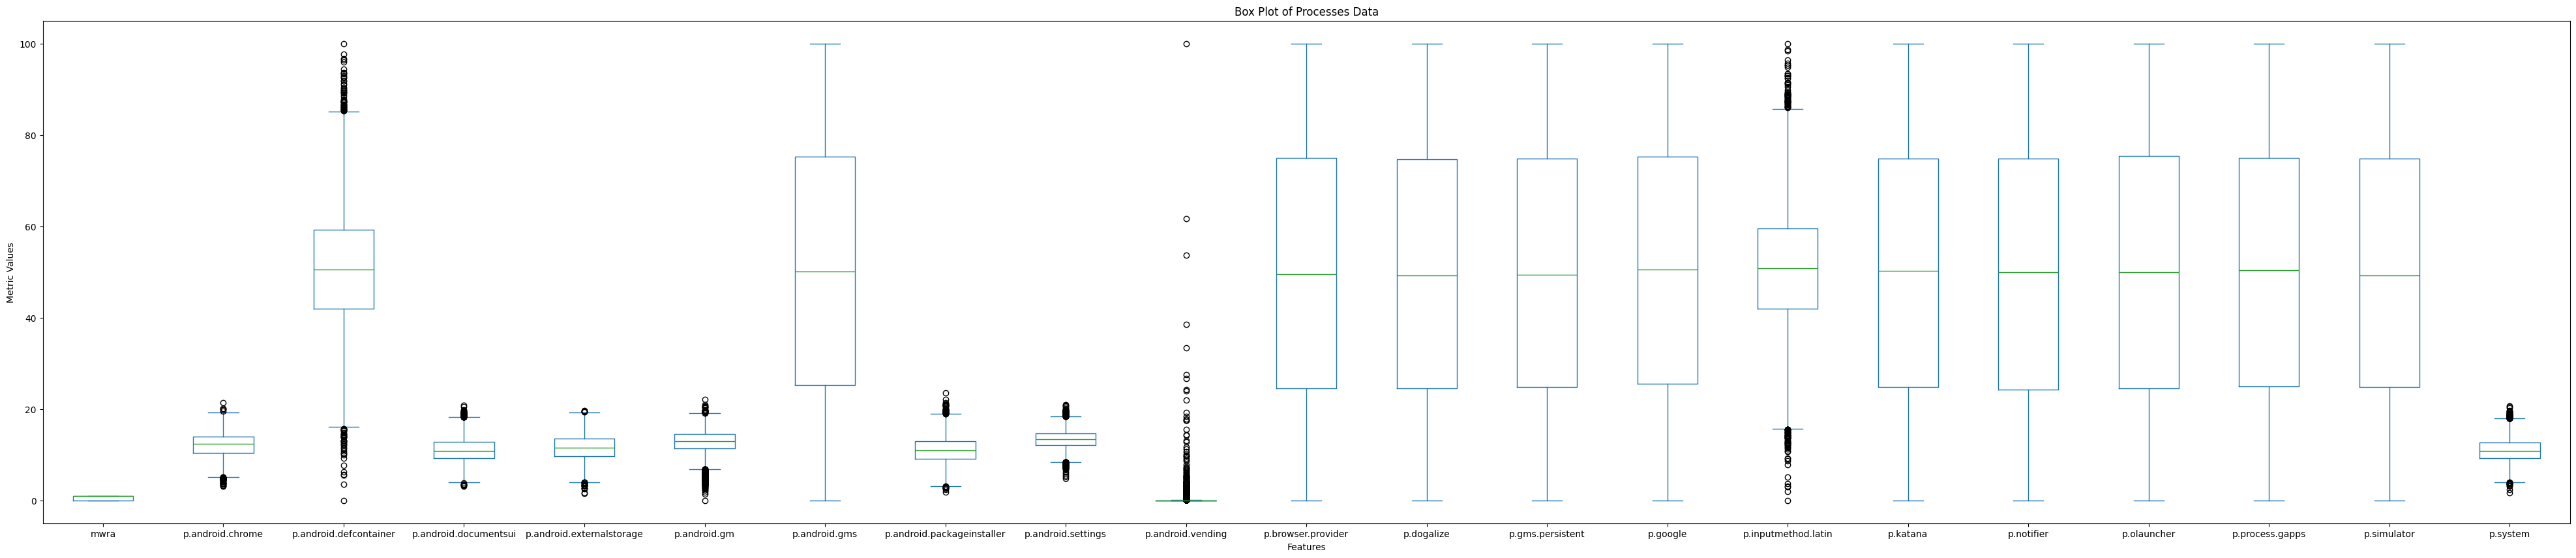

In [15]:
fig, ax = plt.subplots(figsize=(50, 10))

processes[processes.columns.difference(['imei', 'ts'])].plot.box(ax=ax)

plt.xlabel('Features')
plt.ylabel('Metric Values')
plt.title('Box Plot of Processes Data')

Occurrence of values from the column p.android.packageinstaller:

<Axes: ylabel='Frequency'>

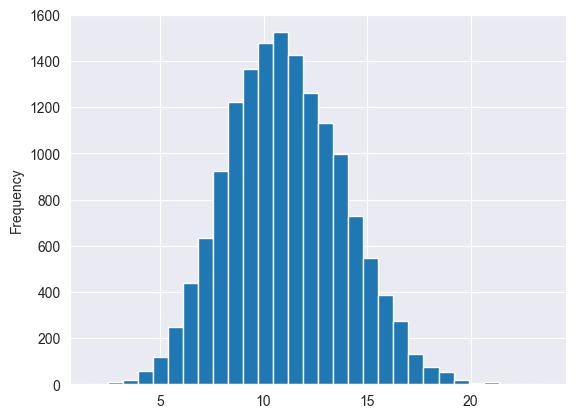

In [23]:
processes['p.android.packageinstaller'].plot.hist(bins=30)

Occurrence of values from the column p.system:

<Axes: ylabel='Frequency'>

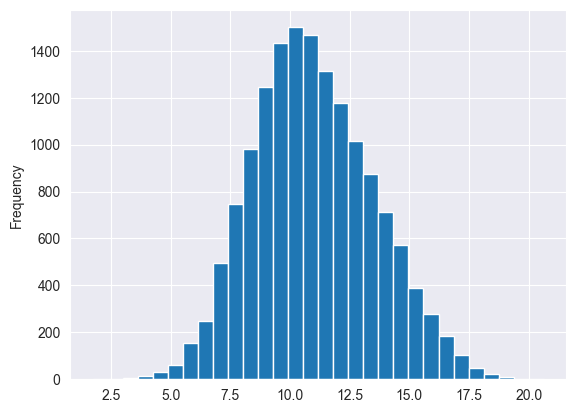

In [24]:
processes['p.system'].plot.hist(bins=30)

Occurrence of values from the column p.android,documentui:

<Axes: ylabel='Frequency'>

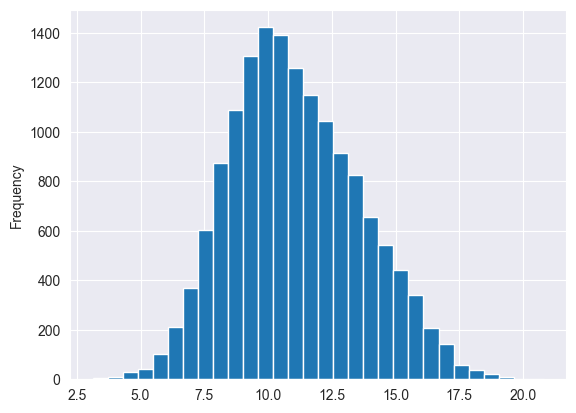

In [25]:
processes['p.android.documentsui'].plot.hist(bins=30)

Occurrence of values from the column p.android.chrome:

<Axes: ylabel='Frequency'>

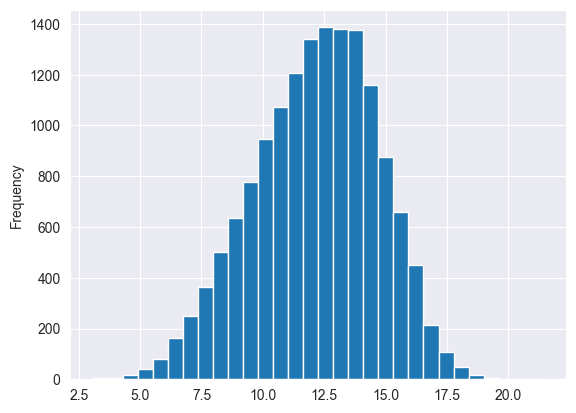

In [26]:
processes['p.android.chrome'].plot.hist(bins=30)

Occurrence of values from the column p.android.settings:

<Axes: ylabel='Frequency'>

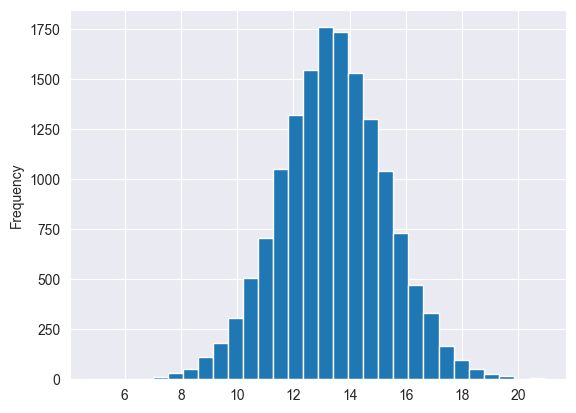

In [27]:
processes['p.android.settings'].plot.hist(bins=30)

Occurrence of values from the column p.android.gm:

<Axes: ylabel='Frequency'>

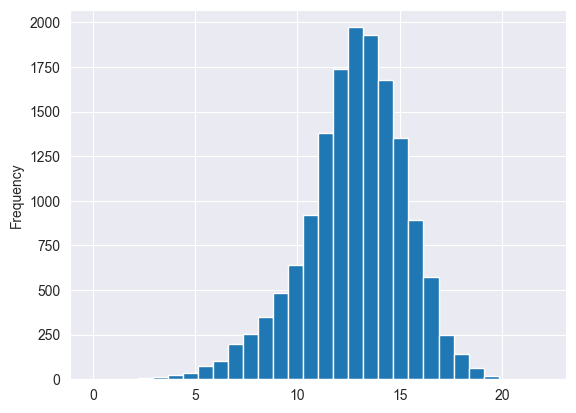

In [28]:
processes['p.android.gm'].plot.hist(bins=30)

Occurrence of values from the column p.android.externalstorage:

<Axes: ylabel='Frequency'>

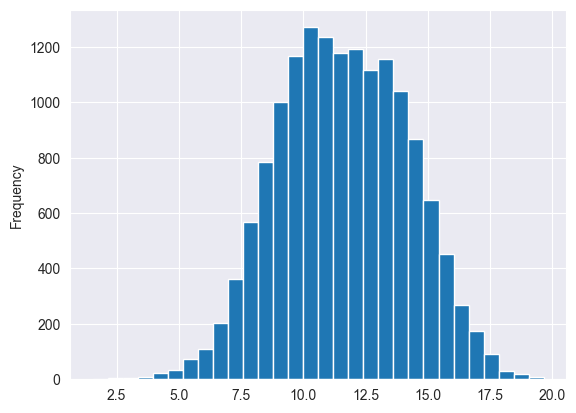

In [29]:
processes['p.android.externalstorage'].plot.hist(bins=30)

Occurrence of values from the column p.android.defcontainer:

<Axes: ylabel='Frequency'>

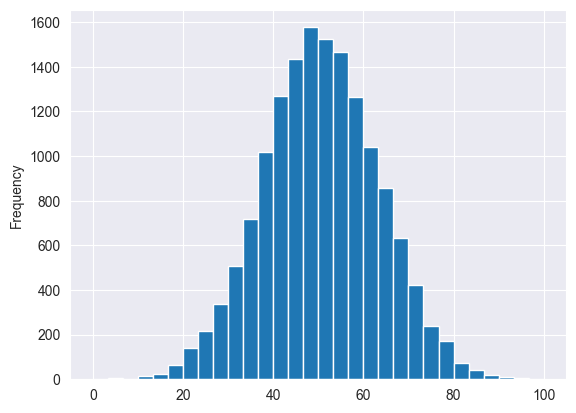

In [30]:
processes['p.android.defcontainer'].plot.hist(bins=30)

Occurrence of values from the column p.android,vending:

<Axes: ylabel='Frequency'>

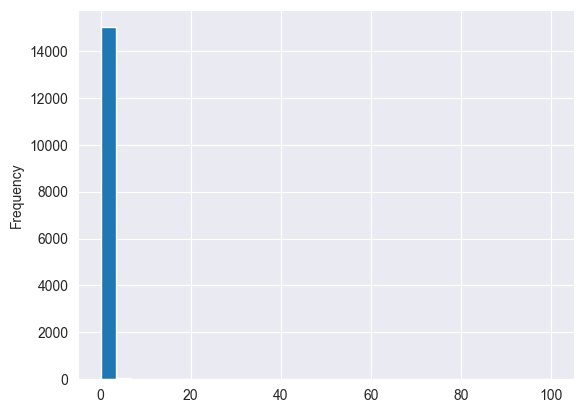

In [31]:
processes['p.android.vending'].plot.hist(bins=30)

Occurrence of values from the column p.input.latin:

<Axes: ylabel='Frequency'>

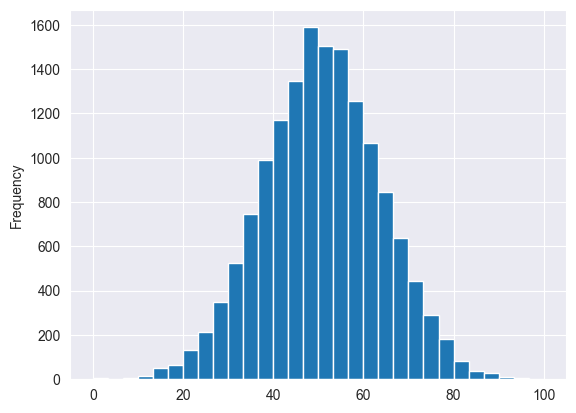

In [32]:
processes['p.inputmethod.latin'].plot.hist(bins=30)

Occurrence of values from the column p.dogalize:

<Axes: ylabel='Frequency'>

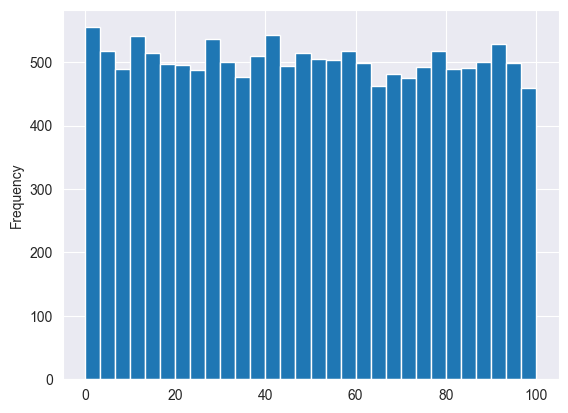

In [33]:
processes['p.dogalize'].plot.hist(bins=30)

Occurrence of values from the column p.process.gapps:

<Axes: ylabel='Frequency'>

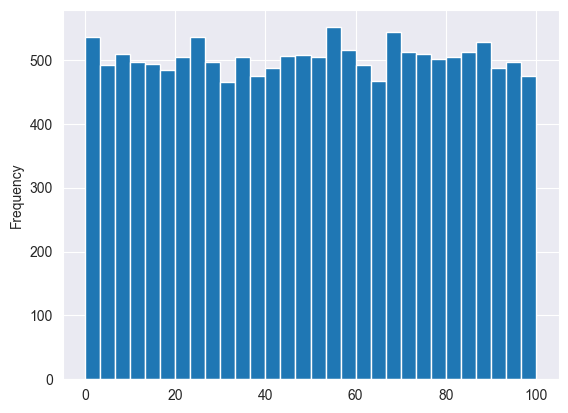

In [34]:
processes['p.process.gapps'].plot.hist(bins=30)

Occurrence of values from the column p.simulator:

<Axes: ylabel='Frequency'>

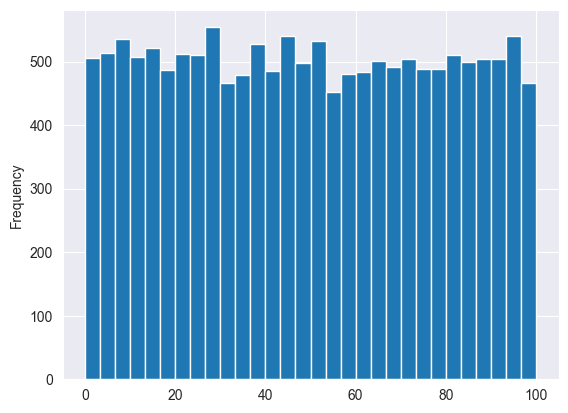

In [35]:
processes['p.simulator'].plot.hist(bins=30)

Occurrence of values from the column p.katana:

<Axes: ylabel='Frequency'>

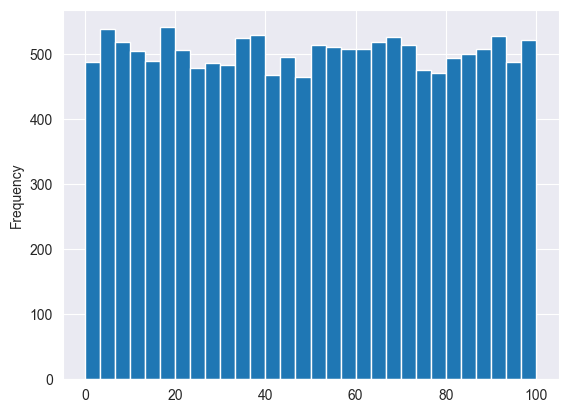

In [36]:
processes['p.katana'].plot.hist(bins=30)

Occurrence of values from the column p.android.gms:

<Axes: ylabel='Frequency'>

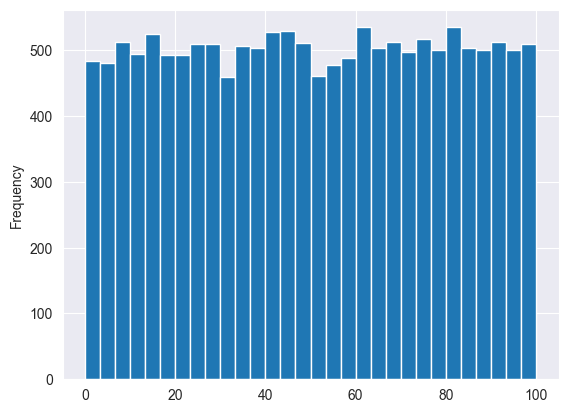

In [37]:
processes['p.android.gms'].plot.hist(bins=30)

Occurrence of values from the column p.google:

<Axes: ylabel='Frequency'>

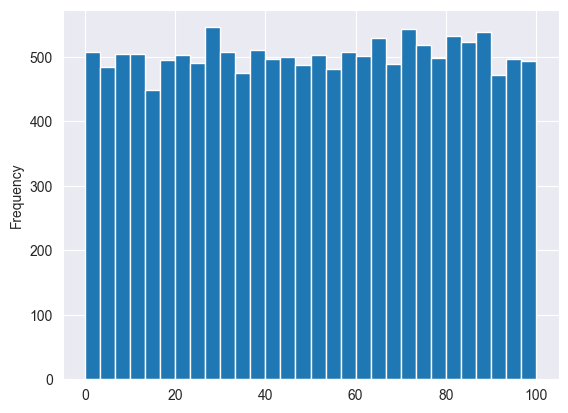

In [38]:
processes['p.google'].plot.hist(bins=30)

Occurrence of values from the column p.olauncher:

<Axes: ylabel='Frequency'>

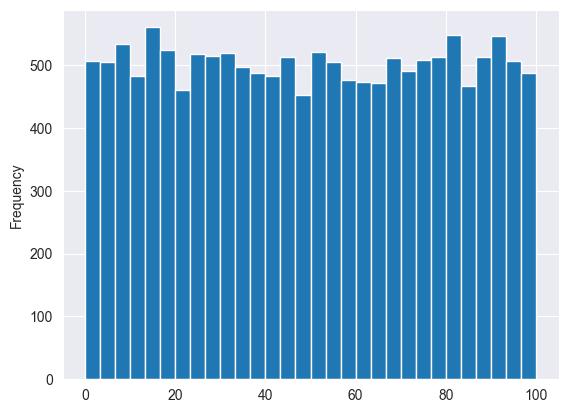

In [39]:
processes['p.olauncher'].plot.hist(bins=30)

Occurrence of values from the column p.browser.provider:

<Axes: ylabel='Frequency'>

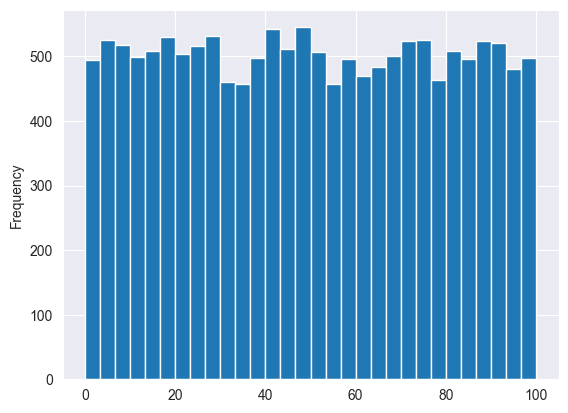

In [40]:
processes['p.browser.provider'].plot.hist(bins=30)

Occurrence of values from the column p.notifier:

<Axes: ylabel='Frequency'>

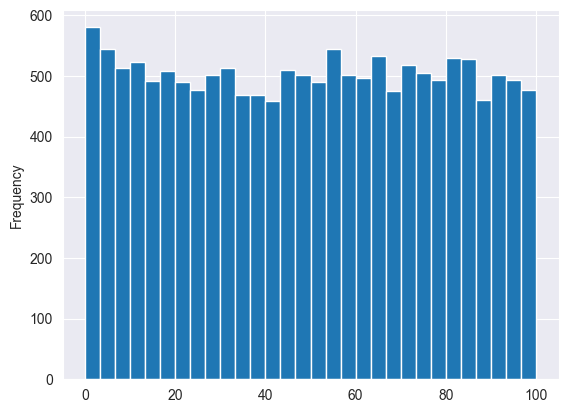

In [41]:
processes['p.notifier'].plot.hist(bins=30)

Occurrence of values from the column p.gms.persistent:

<Axes: ylabel='Frequency'>

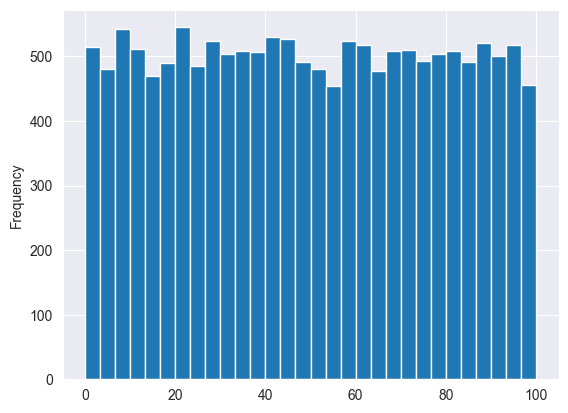

In [42]:
processes['p.gms.persistent'].plot.hist(bins=30)

Data distribution:

Show distribution plot for the p.katana column:

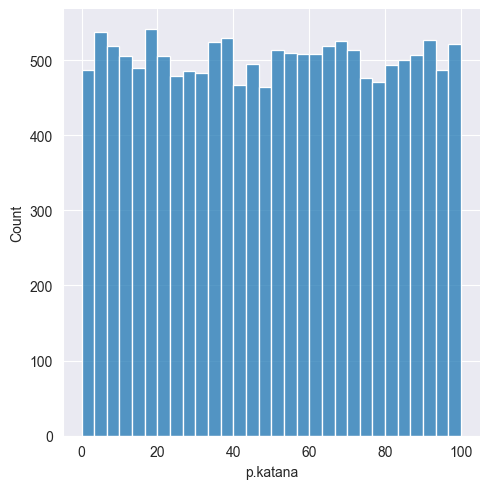

In [43]:
sns.displot(processes['p.katana'], bins=30)

Show distribution plot for the mwra column:

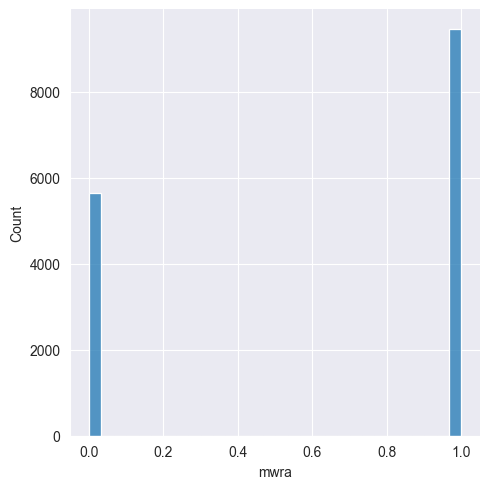

In [44]:
sns.displot(processes['mwra'], bins=30)

Create a boxplot for column p.notifier:

<Axes: ylabel='p.notifier'>

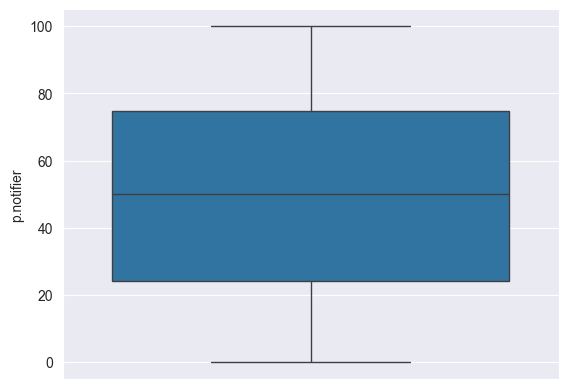

In [45]:
sns.boxplot(processes['p.notifier'])

<Axes: xlabel='p.google', ylabel='Count'>

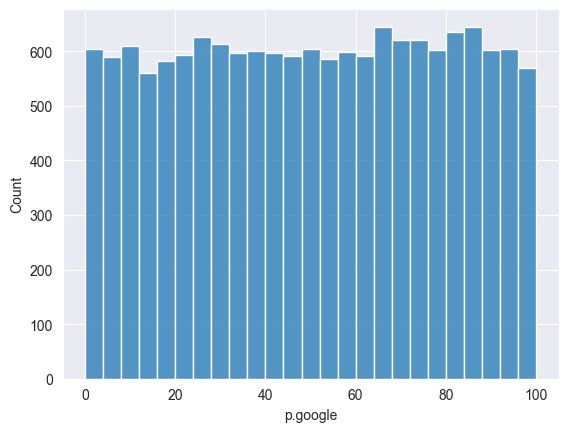

In [46]:
sns.histplot(processes['p.google'])

---------------------------------------------------
#### Pairwise data analysis: Identify relationships and dependencies between pairs of attributes.


Bivariate analysis = Pair analysis, To see correlation between two variables/attributes

<Axes: xlabel='p.android.externalstorage', ylabel='p.android.defcontainer'>

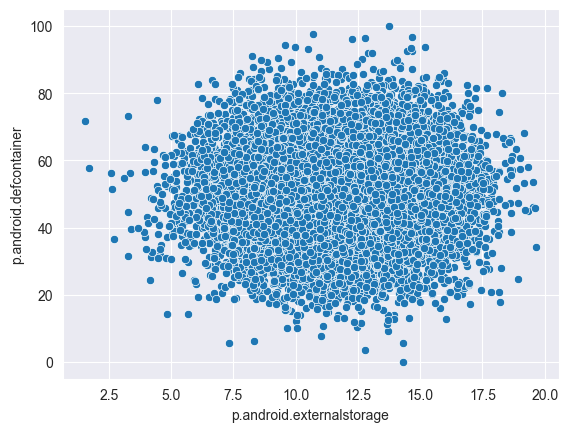

In [47]:
sns.scatterplot(data=processes, x='p.android.externalstorage', y='p.android.defcontainer')

<Axes: xlabel='p.google', ylabel='p.android.gm'>

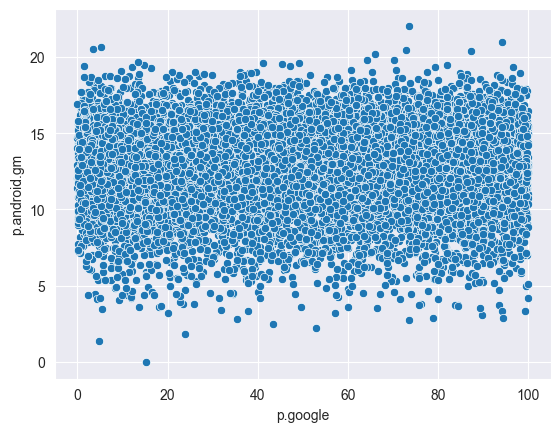

In [48]:
sns.scatterplot(data=processes, x='p.google', y='p.android.gm')

<Axes: xlabel='p.browser.provider', ylabel='p.android.chrome'>

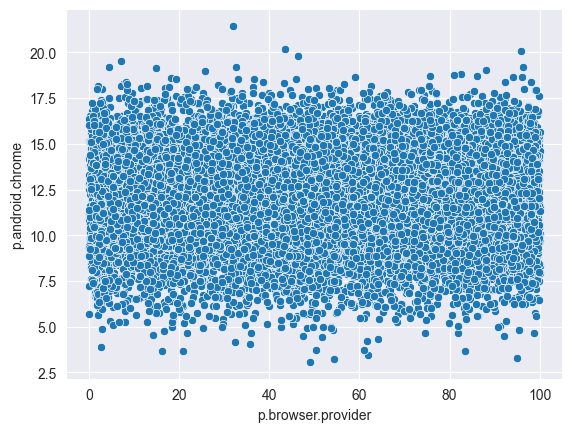

In [50]:
sns.scatterplot(data=processes, x='p.browser.provider', y='p.android.chrome')

Compare the distribution between columns p.android.vending and p.android.defcontainer:

<Axes: xlabel='p.android.vending', ylabel='p.android.defcontainer'>

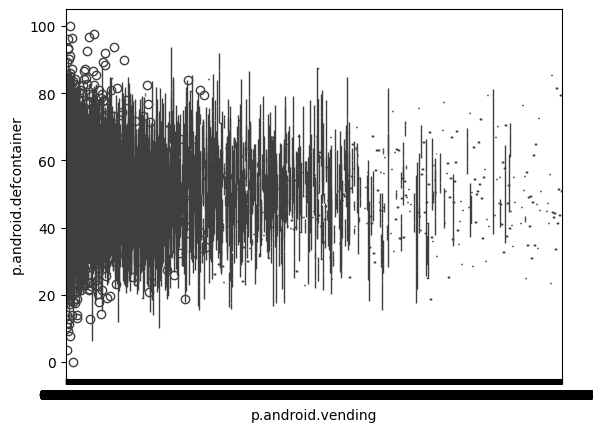

In [19]:
sns.boxplot(x='p.android.vending', y='p.android.defcontainer', data=processes)

Correlation - how strong linear relationship is of the two values

Pearson correlation: -0.002


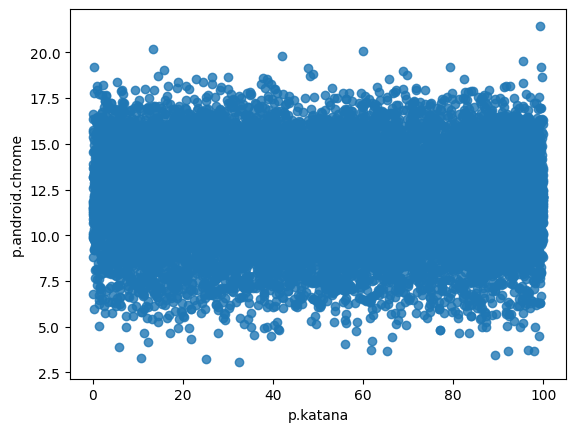

In [22]:
sns.regplot(x="p.katana", y="p.android.chrome", data=processes)
print("Pearson correlation: %.3f" % processes['p.katana'].corr(processes['p.android.chrome']))

Correlation it the table, summary:

In [23]:
processes.corr(numeric_only=True)

,imei,mwra,p.android.packageinstaller,p.system,p.android.documentsui,p.android.chrome,p.android.settings,p.android.gm,p.android.externalstorage,p.android.defcontainer,...,p.dogalize,p.process.gapps,p.simulator,p.katana,p.android.gms,p.google,p.olauncher,p.browser.provider,p.notifier,p.gms.persistent
imei,1.000000,-0.000506,-0.013008,-0.012721,-0.009380,0.011021,0.003971,0.000755,-0.004991,0.005874,...,0.002247,-0.020349,0.006567,0.008386,0.000151,-0.006220,0.002233,0.003595,-0.015962,0.005933
mwra,-0.000506,1.000000,-0.508053,0.275133,-0.551723,0.561349,-0.004384,0.279832,0.000200,0.011684,...,-0.000596,0.005291,0.003755,0.001927,-0.001202,-0.004959,0.000628,-0.003439,-0.001069,-0.013099
p.android.packageinstaller,-0.013008,-0.508053,1.000000,-0.307242,0.562256,-0.459363,0.043955,-0.247453,0.006283,0.001571,...,0.005088,0.003248,0.000159,0.001305,-0.003017,-0.004601,-0.004145,0.020658,0.001150,0.008424
p.system,-0.012721,0.275133,-0.307242,1.000000,-0.278774,0.255631,0.091846,0.043152,0.253048,0.006587,...,0.008501,-0.004170,0.002761,0.001314,0.004260,0.003515,-0.003385,-0.006992,-0.000283,0.001259
p.android.documentsui,-0.009380,-0.551723,0.562256,-0.278774,1.000000,-0.477810,0.084835,-0.216248,0.100393,0.010389,...,0.010278,0.006723,-0.003548,-0.004401,-0.004630,0.004277,-0.002434,0.001830,0.002382,0.009872
p.android.chrome,0.011021,0.561349,-0.459363,0.255631,-0.477810,1.000000,0.127260,0.146009,0.143812,0.003233,...,-0.000260,-0.004973,0.001242,-0.001597,-0.002605,0.003248,0.001248,-0.010330,-0.008278,0.000098
p.android.settings,0.003971,-0.004384,0.043955,0.091846,0.084835,0.127260,1.000000,-0.006059,0.105043,0.010327,...,-0.010423,-0.003078,-0.001992,-0.005342,-0.009368,0.001040,0.000525,-0.006297,0.000668,-0.000891
p.android.gm,0.000755,0.279832,-0.247453,0.043152,-0.216248,0.146009,-0.006059,1.000000,-0.314469,-0.009680,...,-0.011782,0.008144,-0.000524,0.003124,0.002441,-0.002125,0.014824,0.003006,-0.005332,-0.002535
p.android.externalstorage,-0.004991,0.000200,0.006283,0.253048,0.100393,0.143812,0.105043,-0.314469,1.000000,0.003898,...,0.017745,-0.003789,0.027515,0.001702,-0.004183,-0.000648,-0.002160,-0.012244,0.000330,-0.002753
p.android.defcontainer,0.005874,0.011684,0.001571,0.006587,0.010389,0.003233,0.010327,-0.009680,0.003898,1.000000,...,-0.011592,0.017093,-0.002892,-0.005634,-0.001207,0.001838,-0.006031,-0.005309,-0.010727,-0.013486


Show correlations through heatmap to visualize numerical values between columns:

<Axes: >

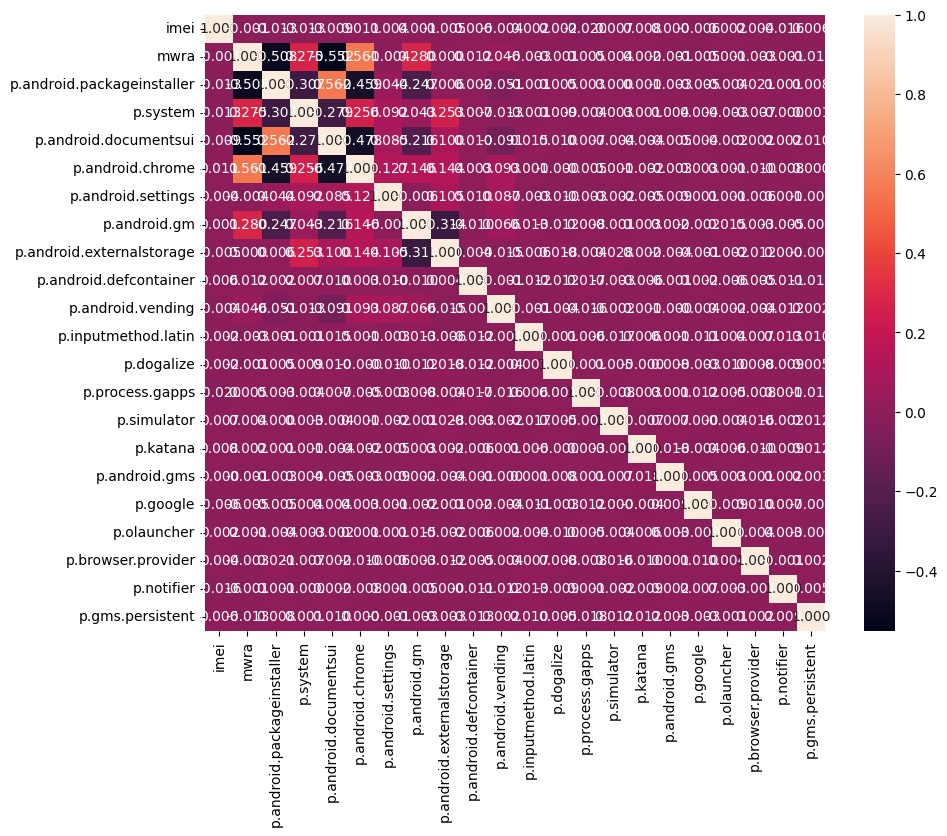

In [24]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(processes.corr(numeric_only=True), ax=ax, annot=True, fmt=".3f")

--------------------------------------------------------------------
#### Paired data analysis: Identify dependencies between the predicted variable and other variables (potential predictors).

Let's see through the *regplot* if there is some relationship between mwra and c.katana. From the *heatmap* it is visible that p.android.packageinstaller has the highest positive value to mwra.

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(processes.corr(numeric_only=True), ax=ax, annot=True, fmt=".3f")

Pearson correlation: -0.508


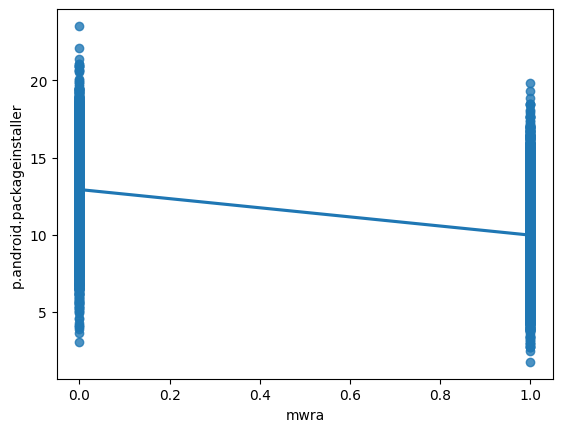

In [27]:
sns.regplot(x="mwra", y="p.android.packageinstaller", data=processes)
print("Pearson correlation: %.3f" % processes['mwra'].corr(processes['p.android.packageinstaller']))

Show boxplot to compare c.katana with mwra. The median is higher where mwra is 0.0

<Axes: xlabel='mwra', ylabel='p.android.packageinstaller'>

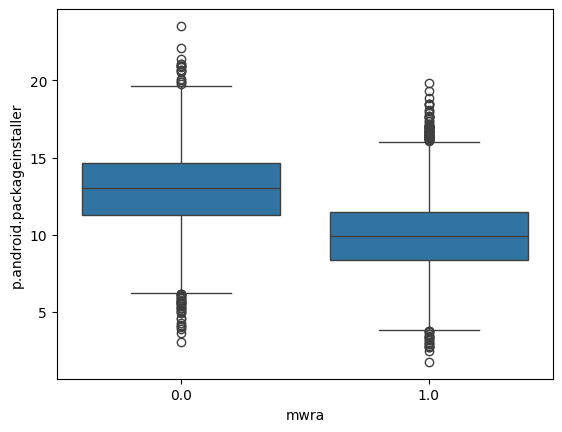

In [28]:
sns.boxplot(x='mwra', y='p.android.packageinstaller', data=processes)